In [1]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import datetime

In [2]:
pwd

'/home/aaird1'

In [2]:
df = pd.read_csv('Glassdoor Data Sets/ActivisionBlizzard_Glassdoor_Data.csv')
df

,Unnamed: 0,Summary,OverallRating,Pros,Cons,Helpful,date,Position,City,State,Status,Tenure
0,0,No comment,3.0,N/a working environment is fun,"low salary, no raise,benefits not good",Be the first to find this review helpful,2021-06-12,Quality Assurance,Irvine,CA,Current Employee,more than 10 years
1,1,happy tester,5.0,very easy to get the hang of it and fun,nothing really negative to say about the job,Be the first to find this review helpful,2021-06-10,Localization QA Tester,Dublin,Dublin,Former Employee,NaN
2,2,Very Good,4.0,- work-life balance\r\n- colleagues\r\n- flexi...,-no game discounts\r\n-pension contribution is...,Be the first to find this review helpful,2021-06-08,Auditor,London,"England, England",Current Employee,less than 1 year
3,3,Hemorrhaging Top Talent,2.0,The human beings you work with are amazing \r\...,New CPO started changing too much and taking t...,Be the first to find this review helpful,2021-06-05,Anonymous Employee,Santa Monica,CA,Former Employee,more than 5 years
4,4,not bad,4.0,"working from home arrangement, nice people, pl...",pay is not enough to cover rents in Dublin,Be the first to find this review helpful,2021-06-05,Localization Specialist,Dublin,Dublin,Current Employee,less than 1 year
...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,Will Sierra studios benefit as a result of the...,3.0,Company wide bonuses all benefit from World of...,VG really doesn't know how to make successful ...,Be the first to find this review helpful,2008-08-05,APM,Vancouver,BC,Current Employee,NaN
211,211,"Fun while it lasted, never had the chance to s...",3.0,People were mostly very competent . Fun enviro...,Products never got enough marketing support . ...,Be the first to find this review helpful,2008-07-18,Software Engineer,Los Angeles,CA,Former Employee,NaN
212,212,Give it a shot.,4.0,This is a QA perspective: They hire from withi...,This is a QA perspective: Even with loyalty an...,Be the first to find this review helpful,2008-07-04,QA Tester,El Segundo,CA,Former Employee,NaN
213,213,A good place to work,4.0,"The atmosphere, people and benefits are incred...",A little slow right now.,Be the first to find this review helpful,2008-06-16,Office Assistant,La Quinta,CA,Current Employee,NaN


In [22]:
sumlen = df['Summary'].apply(len).mean()

In [69]:
df

,filename,num_reviews,sum_length,avg_rating,len_pros,len_cons
0,Glassdoor Data Sets/ActivisionBlizzard_Glassdo...,215,29.465116,3.530233,113.172093,174.725581


In [2]:
MainData = pd.DataFrame(columns = ['filename', 'num_reviews', 'sum_length',  'avg_rating', 'len_pros', 'len_cons'])

In [3]:
for filename in glob.glob('Glassdoor Data Sets/*csv'):

    data = pd.read_csv(filename)
    
    
    num_reviews = len(data)
    data['Summary'] = data['Summary'].astype(str)
    sum_length = data['Summary'].apply(len).mean()
    data['Pros'] = data['Pros'].astype(str)
    len_pros = data['Pros'].apply(len).mean()
    data['Cons'] = data['Cons'].astype(str)
    len_cons = data['Cons'].apply(len).mean()
    avg_rating = data['OverallRating'].mean()
    name = filename
    
    dictionary = {'filename': [filename], 'num_reviews': [num_reviews], 'sum_length': [sum_length],  'avg_rating': [avg_rating], 'len_pros': [len_pros], 'len_cons': [len_cons]}
    df = pd.DataFrame(dictionary)

    MainData = MainData.append(df, ignore_index = True)

In [7]:
MainData

,filename,num_reviews,sum_length,avg_rating,len_pros,len_cons
0,Glassdoor Data Sets/ActivisionBlizzard_Glassdo...,215,29.465116,3.530233,113.172093,174.725581
1,Glassdoor Data Sets/Adobe_Glassdoor_Data.csv,1568,31.531888,4.094388,146.474490,182.337372
2,Glassdoor Data Sets/Akamai_Glassdoor_Data.csv,1800,25.841111,4.060000,112.250000,144.068889
3,Glassdoor Data Sets/ADP_Glassdoor_Data.csv,11880,24.345370,3.624916,102.037458,148.199411
4,Glassdoor Data Sets/Altice_Glassdoor_Data.csv,700,22.408571,2.534286,70.570000,183.647143
...,...,...,...,...,...,...
204,Glassdoor Data Sets/VMWARE_Glassdoor_Data.csv,6420,26.727882,3.942991,109.458879,142.310436
205,Glassdoor Data Sets/Unity_Glassdoor_Data.csv,530,30.432075,4.154717,209.262264,196.620755
206,Glassdoor Data Sets/WEX_Glassdoor_Data.csv,310,24.506452,3.332258,91.319355,163.387097
207,Glassdoor Data Sets/Zendesk_Glassdoor_Data.csv,286,28.328671,4.290210,197.300699,235.685315


In [5]:
MainData.to_csv('Glassdoor_Data_Sum.csv', mode = 'w')

In [15]:
summary = MainData[['sum_length',  'avg_rating', 'len_pros', 'len_cons']].describe()
summary.to_csv('Glassdoor_Summary.csv', mode = 'w')

In [8]:
df = pd.read_csv('Glassdoor_Data_Sum.csv')
df

,Unnamed: 0,filename,num_reviews,sum_length,avg_rating,len_pros,len_cons
0,0,Glassdoor Data Sets/ActivisionBlizzard_Glassdo...,215,29.465116,3.530233,113.172093,174.725581
1,1,Glassdoor Data Sets/Adobe_Glassdoor_Data.csv,1568,31.531888,4.094388,146.474490,182.337372
2,2,Glassdoor Data Sets/Akamai_Glassdoor_Data.csv,1800,25.841111,4.060000,112.250000,144.068889
3,3,Glassdoor Data Sets/ADP_Glassdoor_Data.csv,11880,24.345370,3.624916,102.037458,148.199411
4,4,Glassdoor Data Sets/Altice_Glassdoor_Data.csv,700,22.408571,2.534286,70.570000,183.647143
...,...,...,...,...,...,...,...
204,204,Glassdoor Data Sets/VMWARE_Glassdoor_Data.csv,6420,26.727882,3.942991,109.458879,142.310436
205,205,Glassdoor Data Sets/Unity_Glassdoor_Data.csv,530,30.432075,4.154717,209.262264,196.620755
206,206,Glassdoor Data Sets/WEX_Glassdoor_Data.csv,310,24.506452,3.332258,91.319355,163.387097
207,207,Glassdoor Data Sets/Zendesk_Glassdoor_Data.csv,286,28.328671,4.290210,197.300699,235.685315


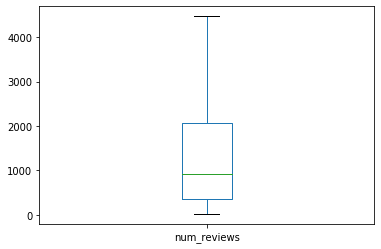

In [13]:
df['num_reviews'].plot(kind="box", showfliers=False)

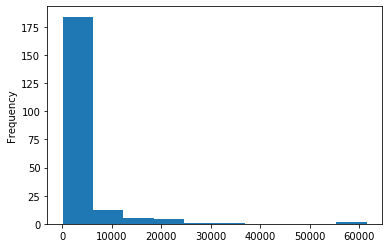

In [14]:
df['num_reviews'].plot(kind="hist")

In [17]:
summary

,sum_length,avg_rating,len_pros,len_cons
count,209.000000,209.000000,209.000000,209.000000
mean,27.094805,3.686123,136.971578,173.422735
std,2.615399,0.416702,56.790846,52.582571
min,20.931062,2.534286,59.366667,79.100000
25%,25.320870,3.412500,96.988571,136.257542
50%,26.942296,3.691219,113.747191,164.690615
75%,28.744000,3.950000,157.050289,203.850720
max,36.986486,4.764615,344.854054,365.936364


In [16]:
average_rating = MainData['num_reviews'].mean()
print(average_rating)
min_rating = MainData['num_reviews'].min()
print(min_rating)
max_rating = MainData['num_reviews'].max()
print(max_rating)

3107.0
20
61578


In [2]:
MainData=MainData.reset_index(drop=True)
MainData.to_csv('Glassdoor_Data_Sum.csv', mode = 'w')

NameError: name 'MainData' is not defined

In [25]:
for filename in glob.glob('Glassdoor Data Sets/*csv'):
    print(filename)

Glassdoor Data Sets/ActivisionBlizzard_Glassdoor_Data.csv
Glassdoor Data Sets/Adobe_Glassdoor_Data.csv
Glassdoor Data Sets/Akamai_Glassdoor_Data.csv
Glassdoor Data Sets/ADP_Glassdoor_Data.csv
Glassdoor Data Sets/Altice_Glassdoor_Data.csv
Glassdoor Data Sets/AMD_Glassdoor_Data.csv
Glassdoor Data Sets/Analog_Glassdoor_Data.csv
Glassdoor Data Sets/Amphenol_Glassdoor_Data.csv
Glassdoor Data Sets/Apple_Glassdoor_Data.csv
Glassdoor Data Sets/Ansys_Glassdoor_Data.csv
Glassdoor Data Sets/AristaNetwork_Glassdoor_Data.csv
Glassdoor Data Sets/AppliedMaterials_Glassdoor_Data.csv
Glassdoor Data Sets/AT&T_Glassdoor_Data.csv
Glassdoor Data Sets/Autodesk_Glassdoor_Data.csv
Glassdoor Data Sets/Broadridge_Glassdoor_Data.csv
Glassdoor Data Sets/CableOne_Glassdoor_Data.csv
Glassdoor Data Sets/CadenceDesign_Glassdoor_Data.csv
Glassdoor Data Sets/CDW_Glassdoor_Data.csv
Glassdoor Data Sets/Charter_Glassdoor_Data.csv
Glassdoor Data Sets/Cisco_Glassdoor_Data.csv
Glassdoor Data Sets/Citrix_Glassdoor_Data.csv
Gl

In [43]:
    data = pd.read_csv('Glassdoor Data Sets/PayPal_Glassdoor_Data.csv')
    
    
    num_reviews = len(data)
    sum_length = data['Summary'].apply(len).mean()
    len_pros = data['Pros'].apply(len).mean()
    len_cons = data['Cons'].apply(len).mean()
    avg_rating = data['OverallRating'].mean()
    
    print(num_reviews, sum_length, len_pros, len_cons, avg_rating)

TypeError: object of type 'float' has no len()

In [28]:
for filename in glob.glob('Glassdoor Data Sets/*csv'):
    data = pd.read_csv(filename)
    
    # new data frame with split value columns
    new = data["Date"].str.split("-", n = 1, expand = True)
  
    # making separate first name column from new data frame
    data["date"]= new[0]
  
    # making separate last name column from new data frame
    data["Employee"]= new[1]
  
    # Dropping old Name columns
    data.drop(columns =["Date"], inplace = True)
    
    # convert type to date
    data['date'] = pd.to_datetime(data['date'])
    
    # new data frame with split value columns
    new = data["Employee"].str.split("in ", n = 1, expand = True)
  
    # making separate first name column from new data frame
    data["Position"]= new[0]
  
    # making separate last name column from new data frame
    data["Location"]= new[1]
  
    # Dropping old Name columns
    data.drop(columns =["Employee"], inplace = True)
    
    #save new file
    data.to_csv(filename, mode = 'w')
    

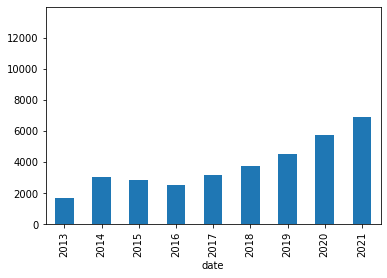

In [25]:
for filename in glob.glob('Glassdoor Data Sets/*csv'):
    df = pd.read_csv(filename)
    df['date'] = pd.to_datetime(df['date']) 
    plot = df['date'].groupby([df["date"].dt.year]).count().plot(kind="bar")
    fig = plot.get_figure()
    fig.savefig(filename+".png")

In [ ]:
for filename in glob.glob('Glassdoor Data Sets/*csv'):
    df = pd.read_csv(filename)
    df['date'] = pd.to_datetime(df['date']) 
    for i in range(1, 210):
        i = df['date'].groupby([df["date"].dt.year]).count().plot(kind="bar")
        print(i)

In [53]:
for filename in glob.glob('Glassdoor Data Sets/*csv'):
    data = pd.read_csv(filename)
    # new data frame with split value columns
    new = data["Author"].str.split(",", n = 1, expand = True)
  
    # making separate first name column from new data frame
    data["Status"]= new[0]
  
    # making separate last name column from new data frame
    data["Tenure"]= new[1]
  
    # Dropping old Name columns
    data.drop(columns =["Author"], inplace = True)
   
    #save new file
    data.to_csv(filename, mode = 'w')
    

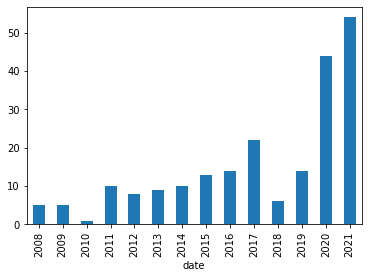

In [14]:
df = pd.read_csv('Glassdoor Data Sets/ActivisionBlizzard_Glassdoor_Data.csv')
df['date'] = pd.to_datetime(df['date'])   
df['date'].groupby([df["date"].dt.year]).count().plot(kind="bar")


In [55]:
for filename in glob.glob('Glassdoor Data Sets/*csv'):
    data = pd.read_csv(filename)
    
    data = data.drop(["Unnamed: 0","Unnamed: 0.1", "Unnamed: 0.1.1", "Unnamed: 0.1.1.1"], axis=1)
    
    #save new file
    data.to_csv(filename, mode = 'w')

In [52]:
data = pd.read_csv('Glassdoor Data Sets/ActivisionBlizzard_Glassdoor_Data.csv')

# new data frame with split value columns
new = data["Author"].str.split(",", n = 1, expand = True)
  
# making separate first name column from new data frame
data["Status"]= new[0]
  
# making separate last name column from new data frame
data["Tenure"]= new[1]
  
 # Dropping old Name columns
data.drop(columns =["Author"], inplace = True)

data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Summary,OverallRating,Pros,Cons,Helpful,date,Position,City,State,Status,Tenure
0,0,0,0,No comment,3.0,N/a working environment is fun,"low salary, no raise,benefits not good",Be the first to find this review helpful,2021-06-12,Quality Assurance,Irvine,CA,Current Employee,more than 10 years
1,1,1,1,happy tester,5.0,very easy to get the hang of it and fun,nothing really negative to say about the job,Be the first to find this review helpful,2021-06-10,Localization QA Tester,Dublin,Dublin,Former Employee,None
2,2,2,2,Very Good,4.0,- work-life balance\r\n- colleagues\r\n- flexi...,-no game discounts\r\n-pension contribution is...,Be the first to find this review helpful,2021-06-08,Auditor,London,"England, England",Current Employee,less than 1 year
3,3,3,3,Hemorrhaging Top Talent,2.0,The human beings you work with are amazing \r\...,New CPO started changing too much and taking t...,Be the first to find this review helpful,2021-06-05,Anonymous Employee,Santa Monica,CA,Former Employee,more than 5 years
4,4,4,4,not bad,4.0,"working from home arrangement, nice people, pl...",pay is not enough to cover rents in Dublin,Be the first to find this review helpful,2021-06-05,Localization Specialist,Dublin,Dublin,Current Employee,less than 1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,210,210,Will Sierra studios benefit as a result of the...,3.0,Company wide bonuses all benefit from World of...,VG really doesn't know how to make successful ...,Be the first to find this review helpful,2008-08-05,APM,Vancouver,BC,Current Employee,None
211,211,211,211,"Fun while it lasted, never had the chance to s...",3.0,People were mostly very competent . Fun enviro...,Products never got enough marketing support . ...,Be the first to find this review helpful,2008-07-18,Software Engineer,Los Angeles,CA,Former Employee,None
212,212,212,212,Give it a shot.,4.0,This is a QA perspective: They hire from withi...,This is a QA perspective: Even with loyalty an...,Be the first to find this review helpful,2008-07-04,QA Tester,El Segundo,CA,Former Employee,None
213,213,213,213,A good place to work,4.0,"The atmosphere, people and benefits are incred...",A little slow right now.,Be the first to find this review helpful,2008-06-16,Office Assistant,La Quinta,CA,Current Employee,None


In [32]:
MainData['date'] = pd.to_datetime(MainData['date'])   
MainData['date'].groupby([MainData["date"].dt.year]).count().plot(kind="bar")

TypeError: no numeric data to plot

In [57]:
FullData = pd.DataFrame(columns=[])
df = pd.read_csv('Glassdoor Data Sets/ActivisionBlizzard_Glassdoor_Data.csv')
FullData = FullData.append(df)

In [59]:
FullData = pd.DataFrame(columns=[])

In [60]:
for filename in glob.glob('Glassdoor Data Sets/*csv'):
    df = pd.read_csv(filename)
    FullData = FullData.append(df)

In [2]:
FullData.to_csv('FullDataSetGlassdoor', mode = 'w')

NameError: name 'FullData' is not defined

In [2]:
#FullData = FullData.drop(['index', 'level_0'], axis=1)
FullData = pd.read_csv('FullDataSetGlassdoor')

In [74]:
FullData['Tenure'].groupby([FullData["Tenure"]]).count()

Tenure
 less than 1 year       59759
 more than 1 year      111574
 more than 10 years     46598
 more than 3 years      91315
 more than 5 years      60227
 more than 8 years      30507
Name: Tenure, dtype: int64

In [75]:
FullData['Status'].groupby([FullData["Status"]]).count()

Status
Current Employee    411602
Current Intern           2
Former Employee     237757
Former Intern            2
Name: Status, dtype: int64

In [76]:
FullData['OverallRating'].groupby([FullData["OverallRating"]]).count()

OverallRating
1.0     46493
2.0     60702
3.0    147028
4.0    210886
5.0    184254
Name: OverallRating, dtype: int64

In [77]:
FullData['Helpful'].groupby([FullData["Helpful"]]).count()

Helpful
1 person found this review helpful           77979
10 people found this review helpful           1613
100 people found this review helpful             1
1043 people found this review helpful            1
106 people found this review helpful             1
                                             ...  
95 people found this review helpful              3
96 people found this review helpful              2
97 people found this review helpful              1
99 people found this review helpful              2
Be the first to find this review helpful    482010
Name: Helpful, Length: 142, dtype: int64

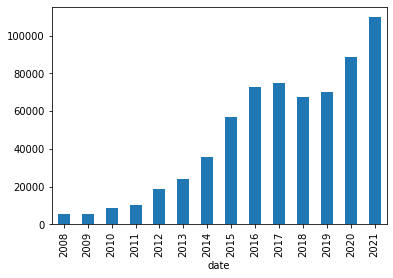

In [3]:
FullData['date'] = pd.to_datetime(FullData['date'])   
FullData['date'].groupby([FullData["date"].dt.year]).count().plot(kind="bar")

In [80]:
FullData['State'].groupby([FullData["State"]]).count()

State
                             311
 04                            1
 25                            2
 2B                            1
 34                            2
                            ... 
 Zakarpattia, Zakarpattia      1
 Zhejiang, Zhejiang            9
 Zug, Zug                      1
 Zurich                        4
 Zürich                      430
Name: State, Length: 536, dtype: int64

In [82]:
FullData['OverallRating'].groupby([FullData["Status"]]).mean()

Status
Current Employee    3.811233
Current Intern      5.000000
Former Employee     3.386087
Former Intern       4.000000
Name: OverallRating, dtype: float64

In [83]:
FullData['Helpful'] = FullData['Helpful'].str.replace('Be the first to find this review helpful', '')

In [85]:
FullData['Helpful'] = FullData['Helpful'].str.replace(' people found this review helpful', '')
FullData['Helpful'] = FullData['Helpful'].str.replace(' person found this review helpful', '')
FullData['Helpful'] = pd.to_numeric(FullData['Helpful'])

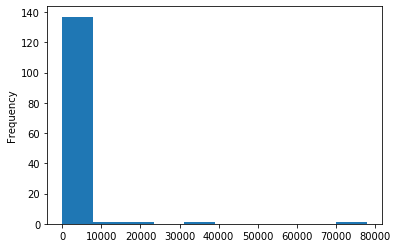

In [87]:
FullData['Helpful'].groupby([FullData["Helpful"]]).count().plot(kind="hist")

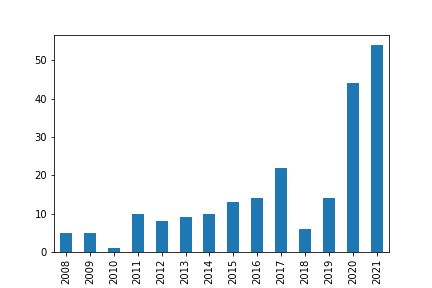

In [94]:
Image.open("Glassdoor Data Sets/ActivisionBlizzard_Glassdoor_Data.csv.png")

In [18]:
FullData['Tenure'].isna().sum()

249383

In [4]:
precovid = FullData[FullData['date'].dt.date < datetime.date(2020,3,1)]
precovid = precovid[precovid['date'].dt.date > datetime.date(2019,3,1)]

In [26]:
precovid6 = precovid[precovid['date'].dt.date > datetime.date(2019,9,1)]

In [27]:
precovid6

,Unnamed: 0,Summary,OverallRating,Pros,Cons,Helpful,date,Position,City,State,Status,Tenure
94,94,Great Experience,4.0,"You work in an excellent team, everyone is fri...",You will have to work overtime,Be the first to find this review helpful,2020-02-19,Localisation QA Tester,Dublin,Dublin,Former Employee,less than 1 year
95,95,"""It's the people"" a company valued that holds ...",4.0,•Amazing people \r\n•Brilliant working atmosphere,•Weekend work can be challenging\r\n•Crunch time,Be the first to find this review helpful,2020-02-17,QA Tester,Dublin,Dublin,Current Employee,less than 1 year
96,96,Good job but long hours and ok pay,4.0,Great people who are always willing to help. F...,Long hours. Overtime is a must. Pay can be bet...,Be the first to find this review helpful,2020-02-08,QA Tester,Eden Prairie,MN,Current Employee,less than 1 year
97,97,QA tester,4.0,learn more about video games,Not too too much challenge,Be the first to find this review helpful,2020-01-20,Agent Trainee Agent Assistant,NaN,NaN,Former Employee,NaN
98,98,Activision Blizzard Media Experience,1.0,There is big and shiny marketing that goes int...,I have never been a part of an organization so...,15 people found this review helpful,2019-12-12,Activision Blizzard Media (Advertising Divisi...,San Francisco,CA,Former Employee,more than 1 year
...,...,...,...,...,...,...,...,...,...,...,...,...
648919,648919,Great place to learn and grow,5.0,In the industry of growing cloud security comp...,Too early to say anything,Be the first to find this review helpful,2019-09-07,Product Support Engineer III,Hyderābād,NaN,Current Employee,less than 1 year
648920,648920,Transforming the Enterprise! - not only a slogan.,5.0,- Great people.\r\n- Top of the edge technolog...,"- Working under stress (not always, but it hap...",Be the first to find this review helpful,2019-09-05,Technical Account Manager,Hyderābād,NaN,Current Employee,more than 3 years
648921,648921,Working with Data Engineering on building comp...,5.0,"Employee friendly , Growing and good learning.",Hire-achy is properly defined,Be the first to find this review helpful,2019-09-04,Senior Software Engineer,NaN,NaN,Current Employee,less than 1 year
648922,648922,Good work culture.,4.0,Startup culture. Pretty employee friendly and ...,Could be a more organized when it comes to new...,Be the first to find this review helpful,2019-09-04,TAM,Hyderābād,NaN,Current Employee,less than 1 year


In [6]:
precovid

,Unnamed: 0,Summary,OverallRating,Pros,Cons,Helpful,date,Position,City,State,Status,Tenure
94,94,Great Experience,4.0,"You work in an excellent team, everyone is fri...",You will have to work overtime,Be the first to find this review helpful,2020-02-19,Localisation QA Tester,Dublin,Dublin,Former Employee,less than 1 year
95,95,"""It's the people"" a company valued that holds ...",4.0,•Amazing people \r\n•Brilliant working atmosphere,•Weekend work can be challenging\r\n•Crunch time,Be the first to find this review helpful,2020-02-17,QA Tester,Dublin,Dublin,Current Employee,less than 1 year
96,96,Good job but long hours and ok pay,4.0,Great people who are always willing to help. F...,Long hours. Overtime is a must. Pay can be bet...,Be the first to find this review helpful,2020-02-08,QA Tester,Eden Prairie,MN,Current Employee,less than 1 year
97,97,QA tester,4.0,learn more about video games,Not too too much challenge,Be the first to find this review helpful,2020-01-20,Agent Trainee Agent Assistant,NaN,NaN,Former Employee,NaN
98,98,Activision Blizzard Media Experience,1.0,There is big and shiny marketing that goes int...,I have never been a part of an organization so...,15 people found this review helpful,2019-12-12,Activision Blizzard Media (Advertising Divisi...,San Francisco,CA,Former Employee,more than 1 year
...,...,...,...,...,...,...,...,...,...,...,...,...
649045,649045,Great work environment! A growing and diversif...,5.0,- Company outlook looks promising \r\n- Compet...,- No 401K matching as of yet (though I believe...,Be the first to find this review helpful,2019-03-11,Escalation Engineer,Raleigh,NC,Current Employee,less than 1 year
649046,649046,Channel Manager,5.0,"wonderful culture, solutions and addressable m...",Let's open a bigger office as planned,1 person found this review helpful,2019-03-11,Channel Manager,London,"England, England",Current Employee,less than 1 year
649047,649047,Working for the best company and recruiting th...,5.0,"Great company, that is growing rapidly, and hi...",I don't see any in my role,1 person found this review helpful,2019-03-11,Recruiter,Detroit,MI,Current Employee,more than 1 year
649048,649048,Innovation at its best,5.0,"Great company, great culture, great technology...",Non that I have for now,1 person found this review helpful,2019-03-11,Anonymous Employee,NaN,NaN,Current Employee,NaN


In [5]:
postcovid = FullData[FullData['date'].dt.date > datetime.date(2020,3,31)]

In [6]:
postcovid = postcovid[postcovid['date'].dt.date < datetime.date(2021,3,31)]

In [24]:
postcovid6 = postcovid[postcovid['date'].dt.date < datetime.date(2020,9,30)]

In [25]:
postcovid6

,Unnamed: 0,Summary,OverallRating,Pros,Cons,Helpful,date,Position,City,State,Status,Tenure
74,74,Best job ever,5.0,"Encourage global travel, cross-team communicat...",Cut off business too quick.,Be the first to find this review helpful,2020-09-24,Marketing Manager,Shanghai,"Shanghai, Shanghai",Former Employee,more than 1 year
75,75,italian localization tester,3.0,"friendly work environment, good shifts",office 2 km from center,Be the first to find this review helpful,2020-09-17,Localization Tester,Dublin,Dublin,Current Employee,NaN
76,76,Got worse after acquired by AB,2.0,Used to be good when it was King,After King was bought by Activision they start...,Be the first to find this review helpful,2020-08-30,Player Support Specialist,Barcelona,NaN,Former Employee,more than 5 years
77,77,-,5.0,Good place to work at!,"No place is perfect, but this one is pretty good",Be the first to find this review helpful,2020-08-20,Senior Quality Engineer,Stockholm,"Stockholm, Stockholm",Current Employee,NaN
78,78,Bad culture and rigid old-school micro-managem...,2.0,Fun multi-cultural environment where you'll ge...,1) Blame culture trickling down from the top t...,8 people found this review helpful,2020-08-19,Anonymous Employee,Dublin,Dublin,Former Employee,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
648785,648785,Powering the Digital Transformation within org...,5.0,- outstanding solution that has a true impact ...,I have no negative feedback on this organization,Be the first to find this review helpful,2020-04-06,Regional Sales Manager,München,"Bavaria, Bavaria",Current Employee,less than 1 year
648786,648786,Amazing support and sales enablement,5.0,Tons of resources at work to make sure that we...,so much information coming in on a daily basis...,Be the first to find this review helpful,2020-04-06,Regional Sales Manager,Toronto,ON,Current Employee,less than 1 year
648787,648787,All 3 P's,5.0,"Zscaler has all 3 P's - Product, People, and P...",Nothing yet...happiest I am been as an employer,Be the first to find this review helpful,2020-04-06,Regional Sales Manager,Nashville,TN,Current Employee,less than 1 year
648788,648788,Great place to work!,5.0,Awesome technology and great leadership. Zsca...,Systems and processes in flux. The company wen...,Be the first to find this review helpful,2020-04-06,Channel Account Manager,Toronto,ON,Current Employee,less than 1 year


In [9]:
postcovid

,Unnamed: 0,Summary,OverallRating,Pros,Cons,Helpful,date,Position,City,State,Status,Tenure
28,28,Great place to work,5.0,- Open minded\r\n- Recognition\r\n- Well paid,- No clear trajectory path,Be the first to find this review helpful,2021-03-26,Anonymous Employee,NaN,NaN,Current Employee,NaN
29,29,A very volatile company with constant massive ...,1.0,The people that work there are passionate and ...,The company hires vendors/companies (ex Blizza...,2 people found this review helpful,2021-03-18,Program Manager,Irvine,CA,Current Employee,more than 3 years
30,30,best job,5.0,awesome job to work in,no cons for this job,Be the first to find this review helpful,2021-03-16,Game Tester,Austin,TX,Current Employee,NaN
31,31,Amazing compnay,4.0,Very good place to work in,The company is very good. There are no cons,Be the first to find this review helpful,2021-03-14,Localisation Game Tester,Dublin,Dublin,Former Employee,less than 1 year
32,32,"Good Friends, Grueling Hours",3.0,As a QA tester you get to hang out with a bunc...,Waves of long hours with no provided time fram...,Be the first to find this review helpful,2021-03-12,Quality Assurance Tester,Eden Prairie,MN,Current Employee,more than 1 year
...,...,...,...,...,...,...,...,...,...,...,...,...
648785,648785,Powering the Digital Transformation within org...,5.0,- outstanding solution that has a true impact ...,I have no negative feedback on this organization,Be the first to find this review helpful,2020-04-06,Regional Sales Manager,München,"Bavaria, Bavaria",Current Employee,less than 1 year
648786,648786,Amazing support and sales enablement,5.0,Tons of resources at work to make sure that we...,so much information coming in on a daily basis...,Be the first to find this review helpful,2020-04-06,Regional Sales Manager,Toronto,ON,Current Employee,less than 1 year
648787,648787,All 3 P's,5.0,"Zscaler has all 3 P's - Product, People, and P...",Nothing yet...happiest I am been as an employer,Be the first to find this review helpful,2020-04-06,Regional Sales Manager,Nashville,TN,Current Employee,less than 1 year
648788,648788,Great place to work!,5.0,Awesome technology and great leadership. Zsca...,Systems and processes in flux. The company wen...,Be the first to find this review helpful,2020-04-06,Channel Account Manager,Toronto,ON,Current Employee,less than 1 year


In [11]:
precovidWFH1 = precovid.dropna(subset = ['Pros', 'Cons'])
postcovidWFH1 = postcovid.dropna(subset = ['Pros', 'Cons'])

In [19]:
precovidWFH = precovidWFH1.loc[precovidWFH['Summary'].str.contains("WFH | work from home | remote| working from home", case=False)]
postcovidWFH = postcovidWFH1.loc[postcovidWFH['Summary'].str.contains("WFH | work from home | remote", case=False)]


In [12]:
precovidWFHpro = precovidWFH1.loc[precovidWFH1['Pros'].str.contains("WFH | work from home | remote| working from home", case=False)]
postcovidWFHpro = postcovidWFH1.loc[postcovidWFH1['Pros'].str.contains("WFH | work from home | remote", case=False)]

In [13]:
precovidWFHcon = precovidWFH1.loc[precovidWFH1['Cons'].str.contains("WFH | work from home | remote| working from home", case=False)]
postcovidWFHcon = postcovidWFH1.loc[postcovidWFH1['Cons'].str.contains("WFH | work from home | remote", case=False)]

In [15]:
print(len(precovidWFHpro))
print(len(precovidWFHcon))
print(len(postcovidWFHpro))
print(len(postcovidWFHcon))

1592
730
2237
982


In [22]:
pd.set_option("display.max_colwidth", -1)

In [25]:
print(postcovidWFHcon['Cons'])

83        Personally if I could have given Blizzard half a star I would have.\r\n\r\nWorking for Blizzard is one of the most horrible experiences I ever had to go through. That feeling of,"OMG I want to work for Blizzard." Quickly changes when you start and becomes,"OMG what have I done?!"\r\n\r\nManagement: Good ol boys club. 98% of management have been there for 10+ years and were a part of the company during its "golden years". Management is stale and tends to shun/discriminate against you if you do not agree to their every word. Their word is the bible and shall not be questioned! They hand out write-ups like its candy and tend to keep to the groups of tenured people. If you complain to HR, they say they listen but normally just ignore you and then say you never told them. Overall, management is just bad here.\r\n\r\nFellow Employees: Some are cool I'll admit but most of them feel like they are high and mighty because they've been there for so long. If you're able to find a good cl